In [1]:
import pandas as pd
import numpy as np
import xarray as xr

%matplotlib inline

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

from scipy.integrate import dblquad

In [2]:
datapath="/work/FAC/FGSE/IDYST/tbeucler/default/saranya/Data/ECMWF/ERA5_25kmx3hr/"
target="/work/FAC/FGSE/IDYST/tbeucler/default/saranya/create_ts/outputs/targets/"
p1="/work/FAC/FGSE/IDYST/tbeucler/default/saranya/create_ts/"

In [4]:

dm1=xr.open_dataset(datapath+'/slev_vars/totprec_2011_2020.nc')

In [440]:
dm0=xr.open_dataset(datapath+'/slev_vars/svars_2016.nc')

In [441]:
dm0

<xarray.Dataset>
Dimensions:  (time: 2928, lon: 1440, lat: 721, lev: 1)
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 ... 2016-12-31T21:00:00
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * lev      (lev) float64 0.0
Data variables: (12/23)
    var165   (time, lat, lon) float32 ...
    var166   (time, lat, lon) float32 ...
    var168   (time, lat, lon) float32 ...
    var167   (time, lat, lon) float32 ...
    var143   (time, lat, lon) float32 ...
    var79    (time, lat, lon) float32 ...
    ...       ...
    var61    (time, lev, lat, lon) float32 ...
    var62    (time, lev, lat, lon) float32 ...
    var54    (time, lev, lat, lon) float32 ...
    var60    (time, lev, lat, lon) float32 ...
    var63    (time, lev, lat, lon) float32 ...
    var213   (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Wed Jun 15 12:11:29 2022: cdo -f nc copy vars_2016.grib ../...
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...

In [511]:
track=pd.read_csv(p1+'tracks_nio/nio_20161206.csv',delimiter=r",")
lon1=track['lon'].to_numpy()
lat1=track['lat'].to_numpy()
pos = arr = np.stack((lat1, lon1), axis=1)
pos.shape

(50, 2)

# 2920 is one year timesteps

In [513]:
track['time'].info()

print(track['time'][0])
print(track['time'][49])

#amphan [[48:99] (may 14.00.00 to may 20.06.00)
#vongfong [2:83] (may 8 06.00 to may 18. 06.00) 
#chanhom oct 3.06.00 to oct 16.21.00 [2:112]
#saudel oct.16.12.00 to oct.26.06.00 [108:187]
#molave oct.21.18.00 to oct.29.00.00 [150:209] 
#goni oct.25.06.00.00 to nov.6.06.00 [178:275] 2386 : 2483
#atsani oct.29.12.00 to nov.07.15.00 [212:286] [2420:2494]
#vamco nov.8.00.00 to nov.16.06.00 [288:355]
#fani dm1.time[928:986]
#luban[2222:2291]
#gaja 2505:2559
#ockhi [2654:2709]
#vardah [2722:2772]
#kyant [2352:2419]
#roanu [1096:1137]
#ashoba[1258:1307]
#chapala [2396:2449]
#megh [2460:2508]
#nanauk [1266:1317]
#hudhud 2258:2309
#nilofar 2364:2437
#viyaru 1030:1083
#phailin [2236:2279]
#lehar [2582:2651]
#madi [2704:2765]
#keila 2410:2467



<class 'pandas.core.series.Series'>
RangeIndex: 50 entries, 0 to 49
Series name: time
Non-Null Count  Dtype 
--------------  ----- 
50 non-null     object
dtypes: object(1)
memory usage: 528.0+ bytes
2016-12-06:06.00.00
2016-12-12:09.00.00


In [519]:
dm1.time[17330:17380]

<xarray.DataArray 'time' (time: 50)>
array(['2016-12-06T06:00:00.000000000', '2016-12-06T09:00:00.000000000',
       '2016-12-06T12:00:00.000000000', '2016-12-06T15:00:00.000000000',
       '2016-12-06T18:00:00.000000000', '2016-12-06T21:00:00.000000000',
       '2016-12-07T00:00:00.000000000', '2016-12-07T03:00:00.000000000',
       '2016-12-07T06:00:00.000000000', '2016-12-07T09:00:00.000000000',
       '2016-12-07T12:00:00.000000000', '2016-12-07T15:00:00.000000000',
       '2016-12-07T18:00:00.000000000', '2016-12-07T21:00:00.000000000',
       '2016-12-08T00:00:00.000000000', '2016-12-08T03:00:00.000000000',
       '2016-12-08T06:00:00.000000000', '2016-12-08T09:00:00.000000000',
       '2016-12-08T12:00:00.000000000', '2016-12-08T15:00:00.000000000',
       '2016-12-08T18:00:00.000000000', '2016-12-08T21:00:00.000000000',
       '2016-12-09T00:00:00.000000000', '2016-12-09T03:00:00.000000000',
       '2016-12-09T06:00:00.000000000', '2016-12-09T09:00:00.000000000',
       '2016-12-09T12:00:00.000000000', '2016-12-09T15:00:00.000000000',
       '2016-12-09T18:00:00.000000000', '2016-12-09T21:00:00.000000000',
       '2016-12-10T00:00:00.000000000', '2016-12-10T03:00:00.000000000',
       '2016-12-10T06:00:00.000000000', '2016-12-10T09:00:00.000000000',
       '2016-12-10T12:00:00.000000000', '2016-12-10T15:00:00.000000000',
       '2016-12-10T18:00:00.000000000', '2016-12-10T21:00:00.000000000',
       '2016-12-11T00:00:00.000000000', '2016-12-11T03:00:00.000000000',
       '2016-12-11T06:00:00.000000000', '2016-12-11T09:00:00.000000000',
       '2016-12-11T12:00:00.000000000', '2016-12-11T15:00:00.000000000',
       '2016-12-11T18:00:00.000000000', '2016-12-11T21:00:00.000000000',
       '2016-12-12T00:00:00.000000000', '2016-12-12T03:00:00.000000000',
       '2016-12-12T06:00:00.000000000', '2016-12-12T09:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2016-12-06T06:00:00 ... 2016-12-12T09:00:00
Attributes:
    standard_name:  time
    axis:           T

In [170]:
#2020  26296
#vongfong  1026:1107 
#chanhom  2210:2320
#saudel 2316:2395
#molave 2358:2417
#goni 2386:2483
#atsani 2420:2494
#vamco 2496:2563 

#27492:27551


#2019          23376
#neoguri  [2304:2421]
#bualoi  2314:2380
#halong 2436:2502
#nakri 2456:2515
#fengshen 2506:2570
#kalmaegi 2502:2605
#fungwong 2564:2617
#kammuri 2620:2717



#wp start from 2014    20456
#2018 jelawat 650:733
#maliksi 1230:1294
#kongrey 2156:2232
#yutu 2342:2451


#muifa 894:947   17536
#lan 2296:2360
#damrey 2424:2465
#haikul 2484:2541



#megi 2120:2183      14608
#sarika 2286:2347
#haima 2298:2367


#maysak 670:769     11688
#mujigae 2176:2219
#koppu 2272:2347
#infa 2558:2639

#tapah 924:971       8768
#nuri 2416:2478
#hagupit 2666:2765

#yagi 1254:1319   5848 addition
#fitow 2170:2235
#danas 2184:2248
#francisco 2300:2386
#krosa 2398:2463
#haiyan 2442:2517


#guchol 1288:1367
#gaemi 2176:2245
#maria 2286:2345
#sontinh 2356:2421
#bopha 2636:2747


#songda 1110:1186
#2011 haima 1330:1407
#nalgae 2148:2221
#washi 2758:2819

In [525]:
dm0.time[2722:2772]

<xarray.DataArray 'time' (time: 50)>
array(['2016-12-06T06:00:00.000000000', '2016-12-06T09:00:00.000000000',
       '2016-12-06T12:00:00.000000000', '2016-12-06T15:00:00.000000000',
       '2016-12-06T18:00:00.000000000', '2016-12-06T21:00:00.000000000',
       '2016-12-07T00:00:00.000000000', '2016-12-07T03:00:00.000000000',
       '2016-12-07T06:00:00.000000000', '2016-12-07T09:00:00.000000000',
       '2016-12-07T12:00:00.000000000', '2016-12-07T15:00:00.000000000',
       '2016-12-07T18:00:00.000000000', '2016-12-07T21:00:00.000000000',
       '2016-12-08T00:00:00.000000000', '2016-12-08T03:00:00.000000000',
       '2016-12-08T06:00:00.000000000', '2016-12-08T09:00:00.000000000',
       '2016-12-08T12:00:00.000000000', '2016-12-08T15:00:00.000000000',
       '2016-12-08T18:00:00.000000000', '2016-12-08T21:00:00.000000000',
       '2016-12-09T00:00:00.000000000', '2016-12-09T03:00:00.000000000',
       '2016-12-09T06:00:00.000000000', '2016-12-09T09:00:00.000000000',
       '2016-12-09T12:00:00.000000000', '2016-12-09T15:00:00.000000000',
       '2016-12-09T18:00:00.000000000', '2016-12-09T21:00:00.000000000',
       '2016-12-10T00:00:00.000000000', '2016-12-10T03:00:00.000000000',
       '2016-12-10T06:00:00.000000000', '2016-12-10T09:00:00.000000000',
       '2016-12-10T12:00:00.000000000', '2016-12-10T15:00:00.000000000',
       '2016-12-10T18:00:00.000000000', '2016-12-10T21:00:00.000000000',
       '2016-12-11T00:00:00.000000000', '2016-12-11T03:00:00.000000000',
       '2016-12-11T06:00:00.000000000', '2016-12-11T09:00:00.000000000',
       '2016-12-11T12:00:00.000000000', '2016-12-11T15:00:00.000000000',
       '2016-12-11T18:00:00.000000000', '2016-12-11T21:00:00.000000000',
       '2016-12-12T00:00:00.000000000', '2016-12-12T03:00:00.000000000',
       '2016-12-12T06:00:00.000000000', '2016-12-12T09:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2016-12-06T06:00:00 ... 2016-12-12T09:00:00
Attributes:
    standard_name:  time
    axis:           T

##### cld_ice=dm0.var79[1030:1083]
cld_liq=dm0.var78[1030:1083]
cloud=cld_ice+cld_liq

In [526]:
cld_ice=dm0.var79[2722:2772]
cld_liq=dm0.var78[2722:2772]
cloud=cld_ice+cld_liq


In [527]:

precip=dm1.var228[17330:17380]


In [528]:
precip_nan=precip.where(precip>0, other='nan')

In [529]:
tc_irad=np.empty((pos.shape[0],4))
tc_irad[:,0] = pos[:,0]-5
tc_irad[:,1] = pos[:,0]+5
tc_irad[:,2] = pos[:,1]-5
tc_irad[:,3] = pos[:,1]+5

In [530]:
tc_irad

array([[ 2.8    , 12.8    , 86.7    , 96.7    ],
       [ 3.21169, 13.21169, 86.3384 , 96.3384 ],
       [ 3.38   , 13.38   , 86.04   , 96.04   ],
       [ 3.6823 , 13.6823 , 85.9861 , 95.9861 ],
       [ 4.1    , 14.1    , 86.1    , 96.1    ],
       [ 4.3817 , 14.3817 , 85.9925 , 95.9925 ],
       [ 4.6    , 14.6    , 86.1    , 96.1    ],
       [ 4.75751, 14.75751, 86.0675 , 96.0675 ],
       [ 4.9    , 14.9    , 86.15   , 96.15   ],
       [ 5.0556 , 15.0556 , 86.2113 , 96.2113 ],
       [ 5.25   , 15.25   , 86.25   , 96.25   ],
       [ 5.5287 , 15.5287 , 86.2575 , 96.2575 ],
       [ 5.8    , 15.8    , 86.25   , 96.25   ],
       [ 5.9572 , 15.9572 , 86.25   , 96.25   ],
       [ 6.1    , 16.1    , 86.25   , 96.25   ],
       [ 6.3075 , 16.3075 , 86.2575 , 96.2575 ],
       [ 6.35   , 16.35   , 86.25   , 96.25   ],
       [ 6.3537 , 16.3537 , 86.2113 , 96.2113 ],
       [ 6.45   , 16.45   , 86.15   , 96.15   ],
       [ 6.4675 , 16.4675 , 86.0862 , 96.0862 ],
       [ 6.55   , 16

In [531]:
ppr=np.zeros((pos.shape[0],40,40))
pp=np.zeros((tc_irad.shape[0],))
ppm=np.zeros((tc_irad.shape[0],))
ppmaskcloud = np.zeros((pos.shape[0],40,40))

In [532]:
for it in range(tc_irad.shape[0]):
    latn, lats, lone, lonw = tc_irad[it,:]
    ppr[it,:,:]=precip[it,:,:].sel(lat=slice(lats,latn),lon=slice(lone,lonw))[0:40,0:40]
    ppmaskcloud[it,:,:]=cloud[it,:,:].sel(lat=slice(lats,latn),lon=slice(lone,lonw))[0:40,0:40]
    ppm[it]=np.nanmax(ppr[it,:,:])

In [533]:
def preproc_integration(array_precip=None,array_cloud=None,cloudmaskvalue=None):
    pprm = array_precip.copy().flatten()
    pprm[array_cloud.copy().flatten()<cloudmaskvalue] = 0
    return pprm.reshape(array_precip.shape)

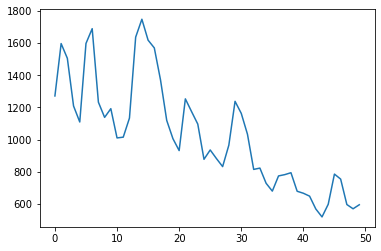

In [534]:
cloudmaskvalue = np.nanpercentile(ppmaskcloud[...].flatten(),10)
masked_precip = [preproc_integration(ppr[i,...],ppmaskcloud[i,...],cloudmaskvalue) for i in range(ppr.shape[0])]
p=(np.trapz(np.trapz(np.asarray(masked_precip),dx=25,axis=1),dx=25,axis=1))
plt.plot(np.trapz(np.trapz(np.asarray(masked_precip),dx=25,axis=1),dx=25,axis=1))
plt.show()

In [535]:
p

array([1271.09497786, 1596.77401185, 1505.33005595, 1208.79285038,
       1109.28870738, 1597.43830562, 1689.44351375, 1232.43756592,
       1137.92441785, 1192.0697242 , 1010.20731032, 1015.00451565,
       1133.4054172 , 1636.69899106, 1747.98153341, 1617.98425019,
       1569.75306571, 1370.73218822, 1118.97937953, 1005.54198027,
        931.500718  , 1253.0451268 , 1173.86870086, 1096.21740878,
        877.28694081,  935.37606299,  882.12266564,  831.94427192,
        965.30012786, 1237.71734536, 1162.76025772, 1032.93076158,
        814.46498632,  822.69094884,  728.34469378,  679.52550948,
        773.96281064,  781.99148178,  793.88260841,  678.62458527,
        666.29253328,  648.21667969,  568.57928634,  519.16792989,
        597.75814414,  785.39043665,  754.24574316,  596.17504478,
        569.75513697,  594.79512274])

In [536]:
ppm=ppm*1000 #to convert to mm/hr

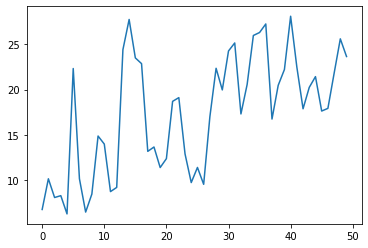

In [537]:
plt.plot(ppm)
#plt.plot(testm)
plt.show()

In [538]:
p.shape

(50,)

In [539]:
df = pd.DataFrame(data=ppm, columns=["tot_Prec_max"])
df1 = pd.DataFrame(data=p, columns=["tot_Prec_Intg"])

In [540]:
df.to_csv(target+'2016_tot_ppt_max_nio_vardah.csv')
df1.to_csv(target+'2016_tot_ppt_int_nio_vardah.csv')

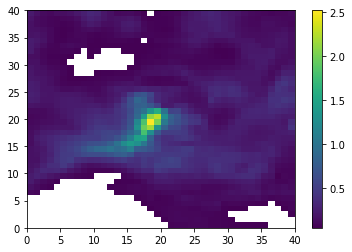

In [24]:
plt.pcolormesh(np.ma.masked_less(ppmaskcloud[15,...],0.05))
plt.colorbar()
plt.show()

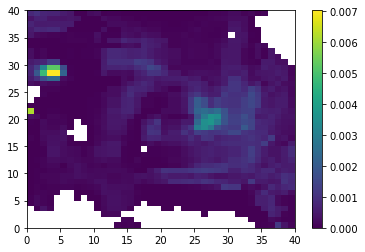

In [31]:
plt.pcolormesh(np.ma.masked_where(ppmaskcloud[15,...]<0.062,ppr[15,...]))
plt.colorbar()
plt.show()

In [ ]:
cloudmaskvalue = np.nanpercentile(ppmaskcloud[...].flatten(),10)
testm = [np.mean(ppr[i,...][~np.ma.masked_where(ppmaskcloud[i,...]<cloudmaskvalue,ppr[i,...]).mask]) for i in range(ppr.shape[0])]

In [ ]:
plt.plot(np.trapz(np.trapz(ppr,dx=25,axis=1),dx=25,axis=1))
plt.plot(np.trapz(np.trapz(np.asarray(masked_precip),dx=25,axis=1),dx=25,axis=1))
plt.show()

In [ ]:
pp=pp*86400 #to convert to mm/day

In [ ]:
np.nanpercentile(cloud[15,280:360,240:500],10)

In [ ]:
cloud[15,280:360,240:500].plot()

In [ ]:
import matplotlib.pyplot as plt
plt.pcolormesh(np.ma.masked_less(precip[15,280:360,240:500],0))
plt.show()

In [ ]:
plt.pcolormesh(np.ma.masked_less(cloud[15,280:360,240:500],0.006958),cmap='magma')
plt.colorbar()
plt.show()